# Manipulação EDA da base de dados Titanic

## Importando pacotes e bibliotecas

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
#---
from utils.tratar_dados import *
from utils.funcoes_graficas import *

## Importando base de dados

### Importando de um .csv

In [3]:
file_name = "titanic"
titanic_dataframe = read_data(file_name)

Read from .pkl file format


### Importando de um .pkl

In [4]:
file_name = "titanic"
titanic_dataframe = read_data(file_name)

Read from .pkl file format


## Tratamento dos dados

### Passando os títulos para minúsculo

In [5]:
titulos = titanic_dataframe.columns
titulos = fix_header_to_standarts(titulos)
titanic_dataframe.columns = titulos

### Remoção de espaços

In [6]:
# Nao foi necessario

### Remoção de caracteres proibidos

In [7]:
# Nao foi necessario

### Normalização dos dados

In [8]:
titanic_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  418 non-null    int64  
 1   survived     418 non-null    int64  
 2   pclass       418 non-null    int64  
 3   name         418 non-null    object 
 4   sex          418 non-null    object 
 5   age          332 non-null    float64
 6   sibsp        418 non-null    int64  
 7   parch        418 non-null    int64  
 8   ticket       418 non-null    object 
 9   fare         417 non-null    float64
 10  cabin        91 non-null     object 
 11  embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [9]:
titanic_dataframe.sample(10)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
147,1039,0,3,"Davies, Mr. Evan",male,22.0,0,0,SC/A4 23568,8.0500,NaN,S
313,1205,1,3,"Carr, Miss. Jeannie",female,37.0,0,0,368364,7.7500,NaN,Q
198,1090,0,2,"Baimbrigge, Mr. Charles Robert",male,23.0,0,0,C.A. 31030,10.5000,NaN,S
167,1059,0,3,"Ford, Mr. Edward Watson",male,18.0,2,2,W./C. 6608,34.3750,NaN,S
330,1222,1,2,"Davies, Mrs. John Morgan (Elizabeth Agnes Mary...",female,48.0,0,2,C.A. 33112,36.7500,NaN,S
403,1295,0,1,"Carrau, Mr. Jose Pedro",male,17.0,0,0,113059,47.1000,NaN,S
114,1006,1,1,"Straus, Mrs. Isidor (Rosalie Ida Blun)",female,63.0,1,0,PC 17483,221.7792,C55 C57,S
124,1016,0,3,"Kennedy, Mr. John",male,NaN,0,0,368783,7.7500,NaN,Q
127,1019,1,3,"McCoy, Miss. Alicia",female,NaN,2,0,367226,23.2500,NaN,Q
48,940,1,1,"Bucknell, Mrs. William Robert (Emma Eliza Ward)",female,60.0,0,0,11813,76.2917,D15,C


#### Tratamento de NaNs

##### Coluna "cabin"

In [10]:
coluna_cabine = "cabin"
for coluna in titanic_dataframe.columns:
    if coluna_cabine == coluna:
        titanic_dataframe[f"{coluna}"] = titanic_dataframe[f"{coluna}"].fillna("unknown")


titanic_dataframe.sample(5)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
266,1158,0,1,"Chisholm, Mr. Roderick Robert Crispin",male,NaN,0,0,112051,0.0000,unknown,S
10,902,0,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,unknown,S
259,1151,0,3,"Midtsjo, Mr. Karl Albert",male,21.0,0,0,345501,7.7750,unknown,S
399,1291,0,3,"Conlon, Mr. Thomas Henry",male,31.0,0,0,21332,7.7333,unknown,Q
410,1302,1,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,unknown,Q


In [11]:
titanic_dataframe.cabin = fix_header_to_standarts(titanic_dataframe.cabin.values)

##### Coluna "age"

In [12]:
coluna_cabine = "age"
media = int(round(titanic_dataframe.age.mean(), 0))

for coluna in titanic_dataframe.columns:
    if coluna_cabine == coluna:
        titanic_dataframe[f"{coluna}"] = titanic_dataframe[f"{coluna}"].fillna(media)


titanic_dataframe.sample(5)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
68,960,0,1,"Tucker, Mr. Gilbert Milligan Jr",male,31.0,0,0,2543,28.5375,c53,C
283,1175,1,3,"Touma, Miss. Maria Youssef",female,9.0,1,1,2650,15.2458,unknown,C
143,1035,0,2,"Beauchamp, Mr. Henry James",male,28.0,0,0,244358,26.0000,unknown,S
160,1052,1,3,"Smyth, Miss. Julia",female,30.0,0,0,335432,7.7333,unknown,Q
373,1265,0,2,"Harbeck, Mr. William H",male,44.0,0,0,248746,13.0000,unknown,S


##### Coluna "embarked"

In [13]:
titanic_dataframe.embarked.unique()

array(['Q', 'S', 'C'], dtype=object)

In [14]:
# NAO EXECUTE ESSA CELUNA MAIS DE UMA UNICA VEZ
titanic_dataframe.embarked = titanic_dataframe.embarked.map({
    "C": 0,
    "Q": 1,
    "S": 2
    }
)

In [15]:
titanic_dataframe.sample(5)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
277,1169,0,2,"Faunthorpe, Mr. Harry",male,40.0,1,0,2926,26.000,unknown,2
123,1015,0,3,"Carver, Mr. Alfred John",male,28.0,0,0,392095,7.250,unknown,2
20,912,0,1,"Rothschild, Mr. Martin",male,55.0,1,0,PC 17603,59.400,unknown,0
391,1283,1,1,"Lines, Mrs. Ernest H (Elizabeth Lindsey James)",female,51.0,0,1,PC 17592,39.400,d28,2
24,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.375,b57_b59_b63_b66,0


##### Coluna "sex"

In [16]:
titanic_dataframe.sex.unique()

array(['male', 'female'], dtype=object)

In [17]:
# NAO EXECUTE ESSA CELUNA MAIS DE UMA UNICA VEZ
titanic_dataframe.sex = titanic_dataframe.sex.map({
    "male": 0,
    "female": 1
    }
)

In [18]:
titanic_dataframe.sample(5)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
285,1177,0,3,"Dennis, Mr. William",0,36.0,0,0,A/5 21175,7.2500,unknown,2
37,929,1,3,"Cacic, Miss. Manda",1,21.0,0,0,315087,8.6625,unknown,2
385,1277,1,2,"Herman, Miss. Kate",1,24.0,1,2,220845,65.0000,unknown,2
208,1100,1,1,"Rosenbaum, Miss. Edith Louise",1,33.0,0,0,PC 17613,27.7208,a11,0
34,926,0,1,"Mock, Mr. Philipp Edmund",0,30.0,1,0,13236,57.7500,c78,0


#### Tratamento de tipos

In [19]:
id_max = titanic_dataframe.passengerid.max()
fare_max = round(titanic_dataframe.fare.max(), 2)
print(f"O maior id é:\t\t{id_max}\nA maior tarifa é:\t{fare_max}\n")

O maior id é:		1309
A maior tarifa é:	512.33



In [20]:
### coluna passengerid
titanic_dataframe.passengerid = titanic_dataframe.passengerid.astype("uint16")

### coluna survided
titanic_dataframe.survived = titanic_dataframe.survived.astype("uint8")

### coluna pclass
titanic_dataframe.pclass = titanic_dataframe.pclass.astype("uint8")

### coluna name
titanic_dataframe.name = titanic_dataframe.name.astype("category")

### coluna sex
titanic_dataframe.sex = titanic_dataframe.sex.astype("uint8")

### coluna age
titanic_dataframe.age = titanic_dataframe.age.astype("uint8")

### coluna sibsp
titanic_dataframe.sibsp = titanic_dataframe.sibsp.astype("uint8")

### coluna parch
titanic_dataframe.parch = titanic_dataframe.parch.astype("uint8")

### coluna ticket
titanic_dataframe.ticket = titanic_dataframe.ticket.astype("category")

### coluna fare
titanic_dataframe.fare = titanic_dataframe.fare.astype("float16")
# titanic_dataframe.fare = titanic_dataframe["fare"].apply(np.floor)

### coluna cabin
titanic_dataframe.cabin = titanic_dataframe.cabin.astype("category")

### coluna embarked
titanic_dataframe.embarked = titanic_dataframe.embarked.astype("uint8")

In [21]:
titanic_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   passengerid  418 non-null    uint16  
 1   survived     418 non-null    uint8   
 2   pclass       418 non-null    uint8   
 3   name         418 non-null    category
 4   sex          418 non-null    uint8   
 5   age          418 non-null    uint8   
 6   sibsp        418 non-null    uint8   
 7   parch        418 non-null    uint8   
 8   ticket       418 non-null    category
 9   fare         417 non-null    float16 
 10  cabin        418 non-null    category
 11  embarked     418 non-null    uint8   
dtypes: category(3), float16(1), uint16(1), uint8(7)
memory usage: 39.7 KB


#### Exclusão de colunas inconclusívas

##### Coluna "name"

In [22]:
titanic_dataframe = titanic_dataframe.drop(["name"], axis=1)
titanic_dataframe.sample(5)

,passengerid,survived,pclass,sex,age,sibsp,parch,ticket,fare,cabin,embarked
347,1239,1,3,1,38,0,0,2688,7.230469,unknown,0
356,1248,1,1,1,59,2,0,11769,51.468750,c101,2
163,1055,0,3,0,30,0,0,343271,7.000000,unknown,2
317,1209,0,2,0,19,0,0,28004,10.500000,unknown,2
203,1095,1,2,1,8,1,1,26360,26.000000,unknown,2


##### Coluna "ticket"

In [23]:
titanic_dataframe = titanic_dataframe.drop(["ticket"], axis=1)
titanic_dataframe.sample(5)

,passengerid,survived,pclass,sex,age,sibsp,parch,fare,cabin,embarked
98,990,1,3,1,20,0,0,7.855469,unknown,2
354,1246,1,3,1,0,1,2,20.578125,unknown,2
4,896,1,3,1,22,1,1,12.289062,unknown,2
35,927,0,3,0,18,0,0,7.230469,unknown,0
226,1118,0,3,0,23,0,0,7.796875,unknown,2


##### Coluna "cabin"

In [24]:
titanic_dataframe = titanic_dataframe.drop(["cabin"], axis=1)
titanic_dataframe.sample(5)

,passengerid,survived,pclass,sex,age,sibsp,parch,fare,embarked
344,1236,0,3,0,30,1,1,14.500000,2
252,1144,0,1,0,27,1,0,136.750000,0
288,1180,0,3,0,30,0,0,7.230469,0
24,916,1,1,1,48,1,3,262.500000,0
130,1022,0,3,0,32,0,0,8.046875,2


#### Resultado final

In [25]:
titanic_dataframe.info()

# Se quiser salvar descomentar bloco a seguir
#
#
# file_name = "titanic"
# save_pkl_file(titanic_dataframe, file_name)
#
#

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  418 non-null    uint16 
 1   survived     418 non-null    uint8  
 2   pclass       418 non-null    uint8  
 3   sex          418 non-null    uint8  
 4   age          418 non-null    uint8  
 5   sibsp        418 non-null    uint8  
 6   parch        418 non-null    uint8  
 7   fare         417 non-null    float16
 8   embarked     418 non-null    uint8  
dtypes: float16(1), uint16(1), uint8(7)
memory usage: 4.6 KB


## Extração dos dados

### Média

#### Coluna "age"

In [26]:
media_idade = round(titanic_dataframe.age.mean(), ndigits=1)
print(f"A média de idade é: {media_idade}\n")

A média de idade é: 30.2



#### Coluna "fare"

In [27]:
media_taxa = round(titanic_dataframe.fare.mean(), ndigits=2)
print(f"A média de taxa é: {media_taxa}\n")

A média de taxa é: 35.625



### Mediana

#### Coluna "age"

In [28]:
mediana_idade = titanic_dataframe.age.median()
print(f"A mediana de idade é: {mediana_idade}\n")

A mediana de idade é: 30.0



#### Coluna "fare"

In [29]:
mediana_taxa = titanic_dataframe.fare.median()
print(f"A mediana de taxa é: {round(mediana_taxa, 0)}\n")

A mediana de taxa é: 14.0



### Moda

#### Coluna "age"

In [30]:
moda_idade = titanic_dataframe.age.mode()
print(f"A moda de idade é: {moda_idade}\n")

A moda de idade é: 0    30
Name: age, dtype: uint8



#### Coluna "fare"

In [31]:
moda_taxa = titanic_dataframe.fare.mode()
print(f"A moda de taxa é: {moda_taxa}\n")

A moda de taxa é: 0    7.75
Name: fare, dtype: float16



### Desvio padrão

#### Coluna "age"

In [32]:
desvio_padrao_idade = round(titanic_dataframe.age.std(), 2)

if desvio_padrao_idade == np.Inf:
    print(f"O desvio padrão da idade é infinito\n")
else:
    print(f"O desvio padrão da idade é: {desvio_padrao_idade}\n")

O desvio padrão da idade é: 12.65



#### Coluna "fare"

In [33]:
desvio_padrao_taxa = round(titanic_dataframe.fare.std(), 2)

if desvio_padrao_taxa == np.Inf:
    print(f"O desvio padrão da taxa é infinito\n")
else:    
    print(f"O desvio padrão da taxa é: {desvio_padrao_taxa}\n")

O desvio padrão da taxa é infinito



### Mínimo

#### Coluna "age"

In [34]:
print(f"O passageiro mais novo tinha {titanic_dataframe.age.min()} anos de idade\n")

O passageiro mais novo tinha 0 anos de idade



#### Coluna "fare"

In [35]:
print(f"O passagem mais barata custou US$ {titanic_dataframe.fare.min()}\n")

O passagem mais barata custou US$ 0.0



### Máximo

#### Coluna "age"

In [36]:
print(f"O passageiro mais velho tinha {titanic_dataframe.age.max()} anos de idade\n")

O passageiro mais velho tinha 76 anos de idade



#### Coluna "fare"

In [37]:
print(f"O passagem mais cara custou US$ {titanic_dataframe.fare.max()}\n")

O passagem mais cara custou US$ 512.5



### Somatório do preço de todas as passagens

#### sum()

In [38]:
somatorio_passagens = titanic_dataframe.fare.sum()
print(f"O somatório do preço de todas as passagenes é: US$ {somatorio_passagens}\n")

O somatório do preço de todas as passagenes é: US$ 14856.0



### Contagem (Count)

#### Coluna "survived"

In [39]:
titanic_dataframe.survived.unique()

array([0, 1], dtype=uint8)

In [40]:
qtd_mortes = titanic_dataframe.survived.value_counts()[1]
qtd_vivos = titanic_dataframe.survived.value_counts()[0]

print(f"O números de sobreviventes é:\t{qtd_vivos}\nO número de mortos é:\t\t{qtd_mortes}\n")

O números de sobreviventes é:	266
O número de mortos é:		152



#### Coluna "pclass"

In [41]:
titanic_dataframe.pclass.unique()

array([3, 2, 1], dtype=uint8)

In [42]:
qtd_classe_1 = titanic_dataframe.pclass.value_counts()[1]
qtd_classe_2 = titanic_dataframe.pclass.value_counts()[2]
qtd_classe_3 = titanic_dataframe.pclass.value_counts()[3]

print(f"O números de pessoas na classe 1 é: {qtd_classe_1}\nO números de pessoas na classe 2 é: {qtd_classe_2}\nO números de pessoas na classe 3 é: {qtd_classe_3}\n")

O números de pessoas na classe 1 é: 107
O números de pessoas na classe 2 é: 93
O números de pessoas na classe 3 é: 218



#### Coluna "sex"

In [43]:
titanic_dataframe.sex.unique()

array([0, 1], dtype=uint8)

In [44]:
qtd_homens = titanic_dataframe.sex.value_counts()[0]
qtd_mulheres = titanic_dataframe.sex.value_counts()[1]

print(f"O números de mulheres é:\t{qtd_mulheres}\nO número de homens é:\t\t{qtd_homens}\n")

O números de mulheres é:	152
O número de homens é:		266



#### Coluna "sibsp"

In [45]:
titanic_dataframe.sibsp.unique()

array([0, 1, 2, 3, 4, 5, 8], dtype=uint8)

In [46]:
qtd_solo = titanic_dataframe.sibsp.value_counts()[0]
qtd_par = titanic_dataframe.sibsp.value_counts()[1]
qtd_trio = titanic_dataframe.sibsp.value_counts()[2]
qtd_quatro = titanic_dataframe.sibsp.value_counts()[3]
qtd_cinco = titanic_dataframe.sibsp.value_counts()[4]
qtd_seis = titanic_dataframe.sibsp.value_counts()[5]
qtd_nove = titanic_dataframe.sibsp.value_counts()[8]

print(f"""
Pessoas sozinhas:               {qtd_solo}
Pessoas com um único familiar:  {qtd_par}
Pessoas com dois familiares:     {qtd_trio}
Pessoas com três familiares:      {qtd_quatro}
Pessoas com quatro familiares:    {qtd_cinco}
Pessoas com cinco familiares:     {qtd_seis}
Pessoas com oito familiares:      {qtd_nove}
      """)


Pessoas sozinhas:               283
Pessoas com um único familiar:  110
Pessoas com dois familiares:     14
Pessoas com três familiares:      4
Pessoas com quatro familiares:    4
Pessoas com cinco familiares:     1
Pessoas com oito familiares:      2
      


#### "parch"

In [47]:
titanic_dataframe.parch.unique()

array([0, 1, 3, 2, 4, 6, 5, 9], dtype=uint8)

In [48]:
parch_zero = titanic_dataframe.parch.value_counts()[0]
parch_um = titanic_dataframe.parch.value_counts()[1]
parch_dois = titanic_dataframe.parch.value_counts()[2]
parch_tres = titanic_dataframe.parch.value_counts()[3]
parch_quatro = titanic_dataframe.parch.value_counts()[4]
parch_cinco = titanic_dataframe.parch.value_counts()[5]
parch_seis = titanic_dataframe.parch.value_counts()[6]
parch_nove = titanic_dataframe.parch.value_counts()[9]

print(f"""
Pessoas com bilhete 0: {parch_zero}
Pessoas com bilhete 1:  {parch_um}
Pessoas com bilhete 2:  {parch_dois}
Pessoas com bilhete 3:   {parch_tres}
Pessoas com bilhete 4:   {parch_quatro}
Pessoas com bilhete 5:   {parch_cinco}
Pessoas com bilhete 6:   {parch_seis}
Pessoas com bilhete 9:   {parch_nove}
      """)


Pessoas com bilhete 0: 324
Pessoas com bilhete 1:  52
Pessoas com bilhete 2:  33
Pessoas com bilhete 3:   3
Pessoas com bilhete 4:   2
Pessoas com bilhete 5:   1
Pessoas com bilhete 6:   1
Pessoas com bilhete 9:   2
      


#### Coluna "embarked"

In [49]:
titanic_dataframe.embarked.unique()

array([1, 2, 0], dtype=uint8)

In [50]:
embarque_c = titanic_dataframe.embarked.value_counts()[0]
embarque_q = titanic_dataframe.embarked.value_counts()[1]
embarque_s = titanic_dataframe.embarked.value_counts()[2]

print(f"Número de pessoas que embarcaram pelo portão C: {embarque_c}\nNúmero de pessoas que embarcaram pelo portão Q: {embarque_q}\nNúmero de pessoas que embarcaram pelo portão S: {embarque_s}\n")

Número de pessoas que embarcaram pelo portão C: 102
Número de pessoas que embarcaram pelo portão Q: 46
Número de pessoas que embarcaram pelo portão S: 270



## Aplicação da biblioteca MatPlotLib

### Boxplot

### Gráfico barras

### Gráfico pizza

### Scatterplot

#### Relação entre classe e preço 

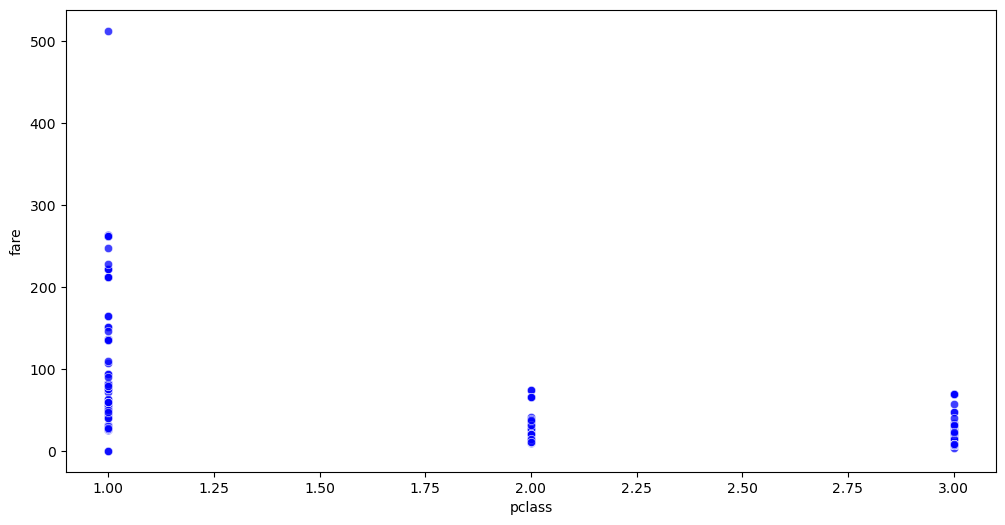

In [51]:
grafico_scatterplot(titanic_dataframe, "pclass", "fare")

#### Relação entre portão de embarque e preço

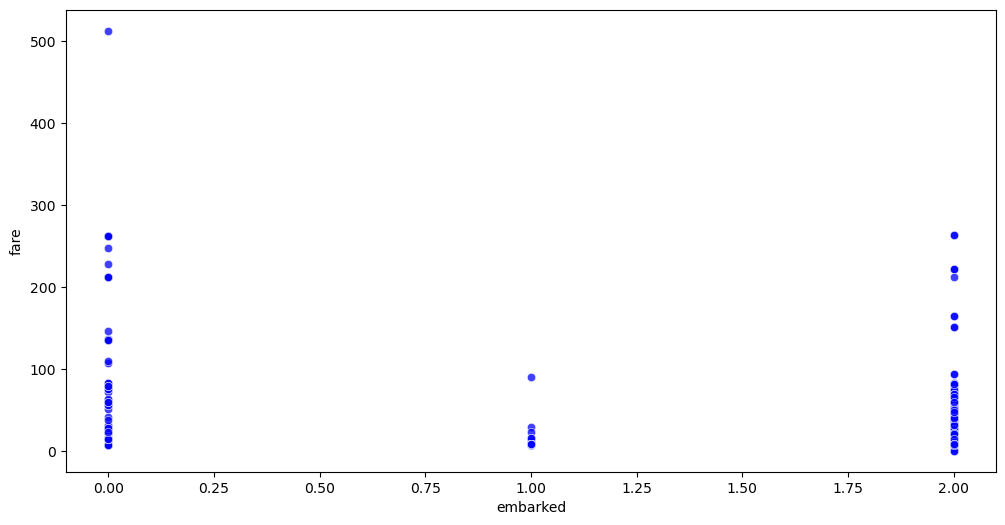

In [53]:
grafico_scatterplot(titanic_dataframe, "embarked", "fare")

## Correlação entre as variáveis

### Heatmap

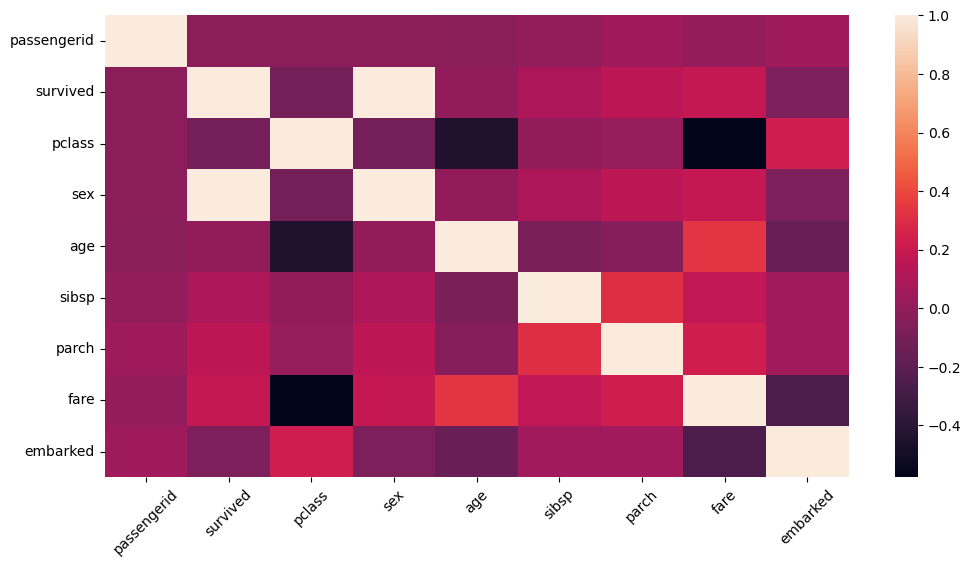

In [52]:
to_heatmap = titanic_dataframe.corr(numeric_only=True)
grafico_heatmap(data = to_heatmap, rotation = 45)